In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from HTML import config as Config

In [2]:
x_train = pd.read_csv(Config.train_path)
x_train.head()

,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,0,Resort Hotel,0,342,2015,July,27,1,0,0,...,No Deposit,NaN,NaN,0,Transient,-6.305161,0,0,Check-Out,2015-07-01
1,1,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,75.052227,0,0,Check-Out,2015-07-03
2,2,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,74.546401,0,0,Check-Out,2015-07-03
3,3,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,76.376288,0,0,Check-Out,2015-07-03
4,4,City Hotel,0,257,2015,July,27,1,0,2,...,No Deposit,6.0,NaN,0,Transient,49.411647,0,0,Check-Out,2015-07-03


In [3]:
y_train = pd.read_csv(Config.train_label_path)
y_train.head()

,arrival_date,label
0,2015-07-01,2.0
1,2015-07-02,1.0
2,2015-07-03,1.0
3,2015-07-04,1.0
4,2015-07-05,1.0


In [4]:
x_train.describe()

,ID,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91531.000000,91527.000000,...,91531.000000,91531.000000,91531.000000,91531.000000,78314.000000,5614.000000,91531.000000,91531.000000,91531.000000,91531.000000
mean,45765.000000,0.357912,96.286843,2015.899837,28.183621,15.814063,0.899291,2.448438,1.835761,0.090968,...,0.033890,0.110236,0.134566,0.213480,83.343834,181.809939,2.962177,84.644487,0.065519,0.528346
std,26422.868082,0.479389,105.454726,0.608632,15.012139,8.758629,1.004555,1.935080,0.605828,0.373917,...,0.180947,0.957503,1.397675,0.635941,107.157625,128.603363,19.925026,51.408067,0.250991,0.766310
min,0.000000,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-144.704486,0.000000,0.000000
25%,22882.500000,0.000000,15.000000,2016.000000,13.000000,8.000000,0.000000,1.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,9.000000,51.000000,0.000000,52.677038,0.000000,0.000000
50%,45765.000000,0.000000,58.000000,2016.000000,31.000000,16.000000,1.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,14.000000,174.000000,0.000000,80.770793,0.000000,0.000000
75%,68647.500000,1.000000,145.000000,2016.000000,41.000000,23.000000,2.000000,3.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,192.000000,242.000000,0.000000,110.468168,0.000000,1.000000
max,91530.000000,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,...,1.000000,26.000000,61.000000,21.000000,510.000000,523.000000,391.000000,5399.424061,8.000000,5.000000


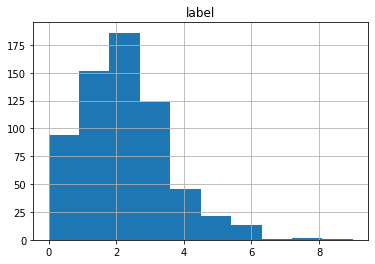

In [5]:
y_train.hist()
plt.show()

In [6]:
month_number = {
    'January': 1,
    'February': 2,
    'March': 3,
    'April': 4,
    'May': 5,
    'June': 6,
    'July': 7,
    'August': 8,
    'September': 9,
    'October': 10,
    'November': 11,
    'December': 12
}
def parse_date(year, month, date):
    return '{:04d}-{:02d}-{:02d}'.format(year, month_number[month], date)

In [7]:
# 'arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month'

In [8]:
def add_arrival_date(x):
    date = [None] * len(x)
    for i, row in x[['arrival_date_year', 'arrival_date_month', 'arrival_date_day_of_month']].iterrows():
        date[i] = parse_date(row[0], row[1], row[2])
    x['arrival_date'] = date
    return x

In [9]:
x_train = add_arrival_date(x_train)

In [18]:
x_train['arrival_date'].value_counts()

2015-12-05    448
2016-11-07    366
2015-10-16    356
2016-10-13    344
2015-09-18    340
             ... 
2015-12-15     29
2015-11-15     28
2015-12-07     27
2015-11-29     20
2015-12-13     19
Name: arrival_date, Length: 640, dtype: int64

In [10]:
y_train

,arrival_date,label
0,2015-07-01,2.0
1,2015-07-02,1.0
2,2015-07-03,1.0
3,2015-07-04,1.0
4,2015-07-05,1.0
...,...,...
635,2017-03-27,2.0
636,2017-03-28,1.0
637,2017-03-29,2.0
638,2017-03-30,3.0


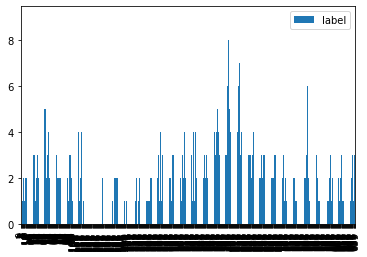

In [11]:
y_train.plot.bar()
plt.show()

In [12]:
y_train.dtypes

arrival_date     object
label           float64
dtype: object

In [13]:
df = y_train.join(x_train.drop_duplicates('arrival_date').set_index('arrival_date'), on='arrival_date')
df.head()

,arrival_date,label,ID,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,2015-07-01,2.0,0,Resort Hotel,0,342,2015,July,27,1,...,No Deposit,NaN,NaN,0,Transient,-6.305161,0,0,Check-Out,2015-07-01
1,2015-07-02,1.0,122,Resort Hotel,1,3,2015,July,27,2,...,No Deposit,240.0,NaN,0,Transient,127.858202,0,2,Canceled,2015-06-29
2,2015-07-03,1.0,215,City Hotel,0,43,2015,July,27,3,...,No Deposit,1.0,NaN,0,Transient-Party,80.738409,0,0,Check-Out,2015-07-05
3,2015-07-04,1.0,271,Resort Hotel,0,2,2015,July,27,4,...,No Deposit,240.0,NaN,0,Transient,156.448523,1,0,Check-Out,2015-07-05
4,2015-07-05,1.0,359,Resort Hotel,1,93,2015,July,28,5,...,No Deposit,243.0,NaN,0,Contract,34.463387,0,0,Canceled,2015-04-03


In [14]:
df[['arrival_date_year', 'label']].groupby('arrival_date_year').describe()

label                                             
                   count      mean       std  min  25%  50%  75%  max
arrival_date_year                                                    
2015               184.0  1.690217  1.473523  0.0  1.0  2.0  2.0  9.0
2016               366.0  2.306011  1.522189  0.0  1.0  2.0  3.0  8.0
2017                90.0  1.555556  0.862595  0.0  1.0  1.0  2.0  3.0

In [15]:
df[['arrival_date_month', 'label']].groupby('arrival_date_month').describe()

label                                               
                   count      mean       std  min   25%  50%   75%  max
arrival_date_month                                                     
April               30.0  2.233333  0.678911  1.0  2.00  2.0  3.00  3.0
August              62.0  3.774194  1.633856  1.0  3.00  4.0  5.00  8.0
December            62.0  1.080645  1.440610  0.0  0.00  1.0  2.00  6.0
February            57.0  1.403509  0.903557  0.0  1.00  1.0  2.00  3.0
January             62.0  0.629032  0.751695  0.0  0.00  0.5  1.00  3.0
July                62.0  2.790323  1.415802  1.0  2.00  3.0  3.75  6.0
June                30.0  2.733333  1.112107  1.0  2.00  3.0  3.00  6.0
March               62.0  1.838710  0.772340  1.0  1.00  2.0  2.00  4.0
May                 31.0  2.516129  0.995690  1.0  2.00  2.0  3.00  4.0
November            60.0  1.000000  1.089239  0.0  0.00  1.0  2.00  5.0
October             62.0  2.112903  0.976861  0.0  1.25  2.0  3.00  5.0
September           60.0  2.833333  1.237366  1.0  2.00  3.0  3.00  9.0